In [31]:
from spacy.lang.nl import Dutch
from collections import Counter
import spacy
from spacy.util import minibatch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import random
import torch
import nl_bertje
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [19]:
df = pd.read_csv("DatasetSA_classification.csv", sep=';')
df = df.dropna(subset=['SA Label'])

In [20]:
df.shape

(2119, 17)

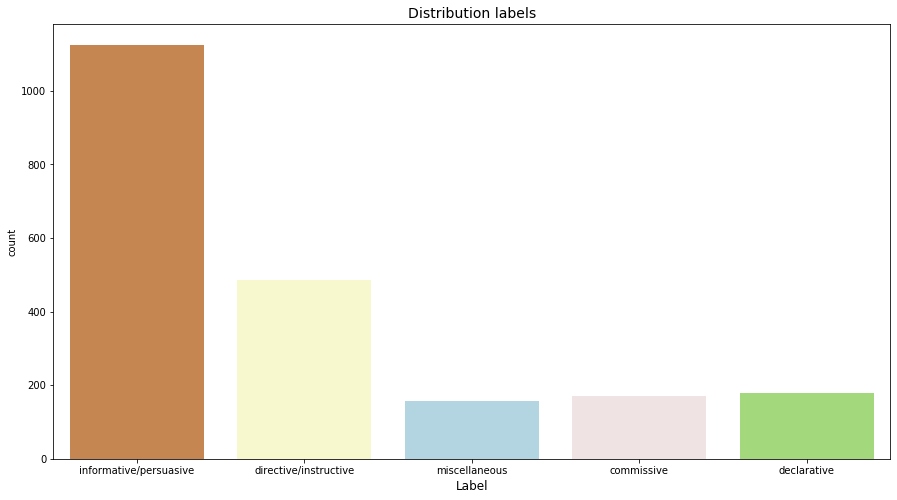

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'SA Label', data = df, palette=['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0' ])
plt.title('Distribution labels', size=14)
plt.xlabel("Label", size=12)
plt.show()








In [22]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'FileCode', 'FileName',
       'FileCaption', 'Sample_nr', 'Text', 'len_text', 'whitespace_count',
       'newline_count', 'perc_newline', 'perc_whitespace', 'total_nr_sent',
       'sent_index_in_tb', 'cleaned_text', 'SA Label'],
      dtype='object')

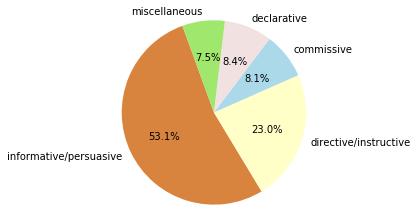

In [63]:
Counter(df['SA Label'])
frac_inf = (1125 / df.shape[0]) * 100
frac_dir = (487 / df.shape[0]) * 100
frac_comm = (171 / df.shape[0]) * 100
frac_decl = (178 / df.shape[0]) * 100
frac_misc = (158 / df.shape[0]) * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels.png')

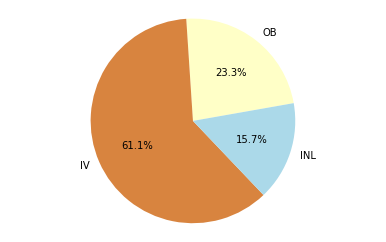

In [53]:
frac_OB = (df[df.FileCode =='OB'].shape[0] / df.shape[0] ) * 100
frac_IV = (df[df.FileCode =='IV'].shape[0] / df.shape[0] ) * 100
frac_INL = (df[df.FileCode =='INL'].shape[0] / df.shape[0] ) * 100


labels = ['OB', 'IV', 'INL']
fractions = [frac_OB, frac_IV, frac_INL]
colors = ['#FFFFC7', '#D8843F', '#ABD9E9']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=10, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=3)
plt.savefig('pics/distribution_domains.png')

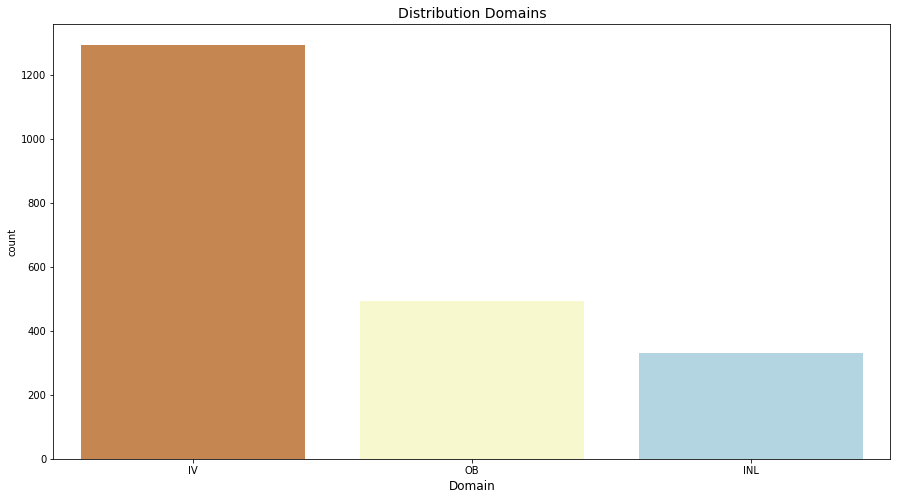

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'FileCode', data = df, palette=['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0' ])
plt.title('Distribution Domains', size=14)
plt.xlabel("Domain", size=12)
plt.show()

In [16]:
df.drop_duplicates('FileName').shape ##750 unique letters

(750, 17)

## Distribution per set

In [33]:
X = df[['FileCode','cleaned_text', 'SA Label']]
y = df[['SA Label']]

In [36]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['SA Label'])

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size= 0.5, random_state=42, stratify=y_valtest)

Counter({'informative/persuasive': 787, 'directive/instructive': 341, 'declarative': 124, 'commissive': 120, 'miscellaneous': 111})


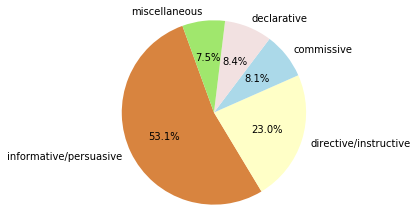

In [62]:
print(Counter(y_train['SA Label']))
frac_inf = (787 / y_train.shape[0]) * 100
frac_dir = (341 / y_train.shape[0]) * 100
frac_comm = (120 / y_train.shape[0]) * 100
frac_decl = (124 / y_train.shape[0]) * 100
frac_misc = (111 / y_train.shape[0]) * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_train.png')

Counter({'informative/persuasive': 169, 'directive/instructive': 73, 'declarative': 27, 'commissive': 25, 'miscellaneous': 24})


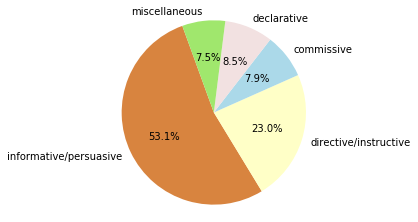

In [61]:
print(Counter(y_val['SA Label']))
frac_inf = (169 / y_val.shape[0]) * 100
frac_dir = (73 / y_val.shape[0]) * 100
frac_comm = (25 / y_val.shape[0]) * 100
frac_decl = (27 / y_val.shape[0]) * 100
frac_misc = (24 / y_val.shape[0]) * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_val.png')

Counter({'informative/persuasive': 169, 'directive/instructive': 73, 'declarative': 27, 'commissive': 26, 'miscellaneous': 23})


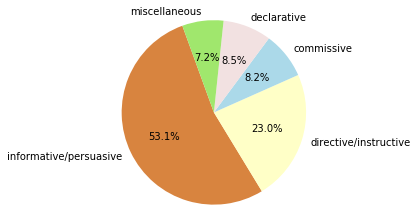

In [60]:
print(Counter(y_test['SA Label']))
frac_inf = (169 / y_test.shape[0]) * 100
frac_dir = (73 / y_test.shape[0]) * 100
frac_comm = (26 / y_test.shape[0]) * 100
frac_decl = (27 / y_test.shape[0]) * 100
frac_misc = (23 / y_test.shape[0]) * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_test.png')

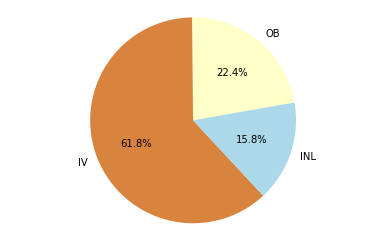

In [56]:
frac_OB = (X_train[X_train.FileCode =='OB'].shape[0] / X_train.shape[0] ) * 100
frac_IV = (X_train[X_train.FileCode =='IV'].shape[0] / X_train.shape[0] ) * 100
frac_INL = (X_train[X_train.FileCode =='INL'].shape[0] / X_train.shape[0] ) * 100


labels = ['OB', 'IV', 'INL']
fractions = [frac_OB, frac_IV, frac_INL]
colors = ['#FFFFC7', '#D8843F', '#ABD9E9']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=10, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=3)
plt.savefig('pics/distribution_domains_train.png')

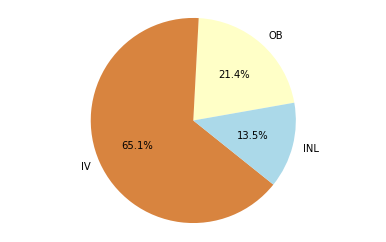

In [57]:
frac_OB = (X_val[X_val.FileCode =='OB'].shape[0] / X_val.shape[0] ) * 100
frac_IV = (X_val[X_val.FileCode =='IV'].shape[0] / X_val.shape[0] ) * 100
frac_INL = (X_val[X_val.FileCode =='INL'].shape[0] / X_val.shape[0] ) * 100


labels = ['OB', 'IV', 'INL']
fractions = [frac_OB, frac_IV, frac_INL]
colors = ['#FFFFC7', '#D8843F', '#ABD9E9']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=10, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=3)
plt.savefig('pics/distribution_domains_val.png')

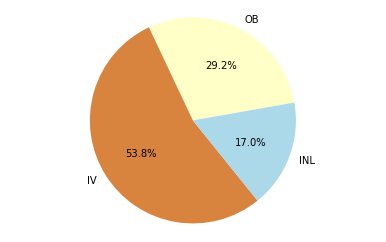

In [58]:
frac_OB = (X_test[X_test.FileCode =='OB'].shape[0] / X_test.shape[0] ) * 100
frac_IV = (X_test[X_test.FileCode =='IV'].shape[0] / X_test.shape[0] ) * 100
frac_INL = (X_test[X_test.FileCode =='INL'].shape[0] / X_test.shape[0] ) * 100


labels = ['OB', 'IV', 'INL']
fractions = [frac_OB, frac_IV, frac_INL]
colors = ['#FFFFC7', '#D8843F', '#ABD9E9']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=10, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=3)
plt.savefig('pics/distribution_domains_test.png')

In [59]:
X_test.shape

(318, 3)

### Plots additional experiments

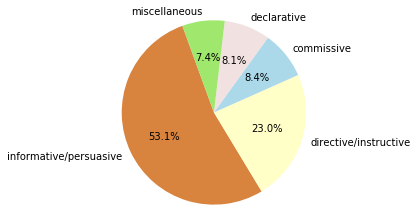

In [71]:
#old 
frac_inf = 900 / 1695 * 100
frac_dir = 390 / 1695 * 100
frac_comm = 142 / 1695 * 100
frac_decl = 137 / 1695 * 100
frac_misc = 126 / 1695 * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_additional_original.png')

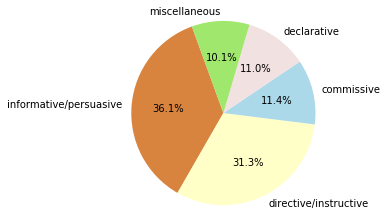

In [72]:
#undersampling
frac_inf = 450 / 1245 * 100
frac_dir = 390 / 1245 * 100
frac_comm = 142 / 1245 * 100
frac_decl = 137 / 1245 * 100
frac_misc = 126 / 1245 * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_additional_undersampled.png')

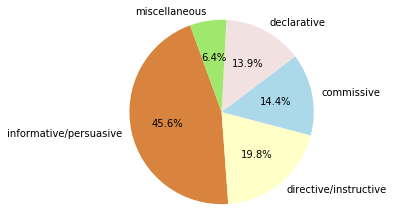

In [73]:
frac_inf = 900 / 1974 * 100
frac_dir = 390 / 1974 * 100
frac_comm = 284 / 1974 * 100
frac_decl = 274 / 1974 * 100
frac_misc = 126 / 1974 * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_additional_oversampled.png')

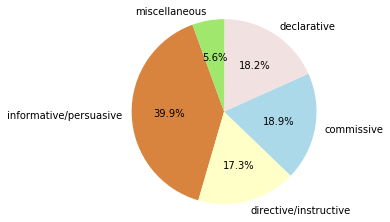

In [74]:
frac_inf = 900 / 2253 * 100
frac_dir = 390 / 2253 * 100
frac_comm = 426 / 2253 * 100
frac_decl = 411 / 2253 * 100
frac_misc = 126 / 2253 * 100

labels = ['informative/persuasive', 'directive/instructive', 'commissive', 'declarative', 'miscellaneous']
fractions = [frac_inf, frac_dir, frac_comm, frac_decl, frac_misc]
colors = ['#D8843F', '#FFFFC7', '#ABD9E9', '#F2E1E1', '#A0E76D', '#CBCEFB', '#C0C0']
fig1, ax1 = plt.subplots()
ax1.pie(fractions, labels=labels, autopct = '%1.1f%%',startangle=110, colors=colors)
ax1.axis('equal')
plt.tight_layout(pad=4)
plt.savefig('pics/distribution_labels_additional_oversampled_3.png')

In [1]:
df = pd.read_csv("DatasetSA_classification.csv", sep=';')
df = df.dropna(subset=['SA Label'])
df[0]

NameError: name 'pd' is not defined

In [85]:
dfIV = df[df['FileCode'] == 'IV']
dfIV.shape

(1294, 17)

In [86]:
Counter(dfIV['SA Label'])

Counter({'informative/persuasive': 674,
         'miscellaneous': 129,
         'directive/instructive': 294,
         'declarative': 88,
         'commissive': 109})

In [87]:
dfOB = df[df['FileCode'] == 'OB']
dfOB.shape

(493, 17)

In [88]:
Counter(dfOB['SA Label'])

Counter({'informative/persuasive': 279,
         'directive/instructive': 98,
         'miscellaneous': 12,
         'commissive': 42,
         'declarative': 62})

In [89]:
dfINL = df[df['FileCode'] == 'INL']
dfINL.shape

(332, 17)

In [90]:
Counter(dfINL['SA Label'])

Counter({'miscellaneous': 17,
         'directive/instructive': 95,
         'informative/persuasive': 172,
         'commissive': 20,
         'declarative': 28})